# Data Exploration
- Data 606 Capstone Project
- Project name : Speech Emotion Recognition (SER)
- Github : https://github.com/DATA-606-2023-FALL-THURSDAY/Narava_Pranay
- Author: Pranay manikanta Narava
- Date:09/03/2023

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
import librosa
import librosa.display
from IPython.display import Audio

In [2]:
Ravdess = "/content/drive/MyDrive/Audio_Speech_Actors_01-24"

In [3]:
ravdess_directory_list = os.listdir(Ravdess)

In [4]:
ravdess_directory_list

['Actor_05',
 'Actor_06',
 'Actor_07',
 'Actor_08',
 'Actor_09',
 'Actor_10',
 'Actor_11',
 'Actor_12',
 'Actor_13',
 'Actor_14',
 'Actor_15',
 'Actor_16',
 'Actor_17',
 'Actor_18',
 'Actor_19',
 'Actor_20',
 'Actor_21',
 'Actor_22',
 'Actor_23',
 'Actor_24',
 'Actor_01',
 'Actor_02',
 'Actor_03',
 'Actor_04']

In [5]:
file_emotion = []
file_path = []

for dir in ravdess_directory_list:
    actor = os.listdir(Ravdess+ '/' + dir)
    for file in actor:
        part = file.split('.')[0]
        part = part.split('-')
        file_emotion.append(int(part[2]))
        file_path.append(Ravdess + '/' + dir + '/' + file)

emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

path_df = pd.DataFrame(file_path, columns=['Path'])
Ravdess_df = pd.concat([emotion_df, path_df], axis=1)

In [6]:
Ravdess_df.Emotions.replace({1:'neutral', 2:'calm', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'}, inplace=True)
Ravdess_df.head()

,Emotions,Path
0,calm,/content/drive/MyDrive/Audio_Speech_Actors_01-...
1,neutral,/content/drive/MyDrive/Audio_Speech_Actors_01-...
2,neutral,/content/drive/MyDrive/Audio_Speech_Actors_01-...
3,neutral,/content/drive/MyDrive/Audio_Speech_Actors_01-...
4,neutral,/content/drive/MyDrive/Audio_Speech_Actors_01-...


In [7]:
value_counts = Ravdess_df['Emotions'].value_counts().reset_index()
value_counts.columns = ['Category', 'Count']


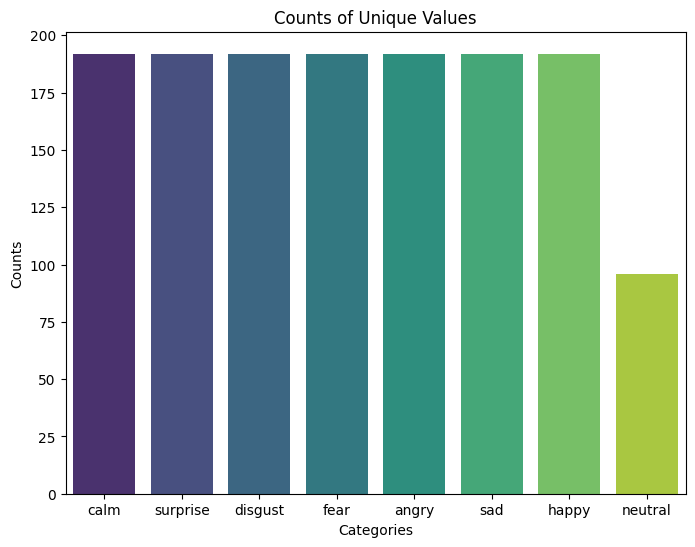

In [8]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Category', y='Count', data=value_counts, palette='viridis')
plt.title('Counts of Unique Values')
plt.xlabel('Categories')
plt.ylabel('Counts')
plt.xticks(rotation=0)
plt.show()

In [13]:
def create_waveplot(data, sr, e):
    plt.figure(figsize=(10, 3))
    plt.title('Waveplot for audio with {} emotion'.format(e), size=15)
    librosa.display.waveshow(data, sr=sr)
    plt.show()

In [14]:
def create_spectrogram(data, sr, e):
    X = librosa.stft(data)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(12, 3))
    plt.title('Spectrogram for audio with {} emotion'.format(e), size=15)
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()

In [15]:
Ravdess_df.Path[0]

'/content/drive/MyDrive/Audio_Speech_Actors_01-24/Actor_05/03-01-02-01-01-01-05.wav'

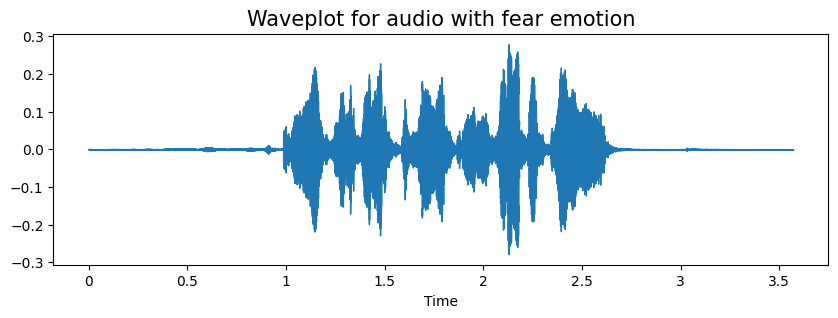

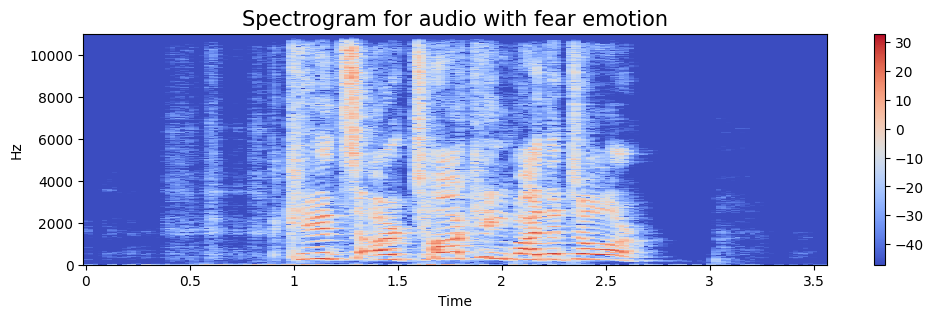

In [16]:
emotion='fear'
path = np.array(Ravdess_df.Path[Ravdess_df.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)